# Plot Barcelona streets

In [ ]:
from geopandas import GeoDataFrame
import pandas as pd
from shapely.geometry import LineString
import typing as T
from itertools import zip_longest

In [23]:
def convert_line_to_wkt(line: str) -> LineString:
    splitted_line = line.split(",")
    reshaped_line = reshape_line(splitted_line, chunksize=2, fillvalue=None)
    return LineString(reshaped_line)
    
def reshape_line(line: T.List[str], chunksize: int, fillvalue: int) -> T.Iterable[T.Tuple[float]]:
    """Reshape a line to match the LineString WKT format
    
    This is based on `zip_longest`, read more in 
    <https://docs.python.org/3/library/itertools.html#itertools.zip_longest> and
    in the StackOverflow solution posted in <https://stackoverflow.com/a/434411/5819113>
    
    
        zip_longest('ABCD', 'xy', fillvalue='-') --> Ax By C- D-
       
    """
    args = [iter(float(el) for el in line)] * chunksize
    return zip_longest(*args, fillvalue=fillvalue)

/home/irene/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


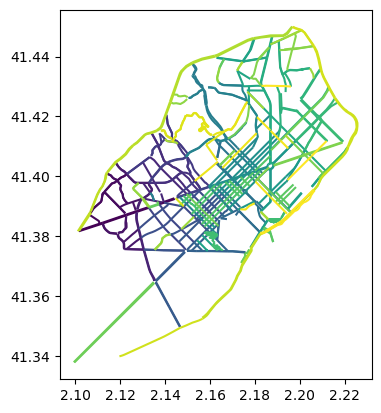

In [22]:
streets = pd.read_csv("../data/transit_relacio_trams.csv", sep=",")
# let's process the whole column
coords_wkt = streets["Coordenades"].apply(lambda line: convert_line_to_wkt(line))
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(streets, crs=crs, geometry=coords_wkt)
ax = gdf.plot(cmap="viridis")